In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\training_set'
test_dir = r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\test_set'


In [3]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading datasets
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Input layer
model.add(Input(shape=(64, 64, 3)))

# Convolution + Pooling
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding more convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
history = model.fit(
    training_set,
    epochs=25,
    validation_data=test_set
)


C:\Users\bhaum\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.5621 - loss: 0.7000

C:\Users\bhaum\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 219s 861ms/step - accuracy: 0.5623 - loss: 0.6999 - val_accuracy: 0.7055 - val_loss: 0.5883
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 159s 448ms/step - accuracy: 0.6791 - loss: 0.5998 - val_accuracy: 0.6850 - val_loss: 0.5827
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 256ms/step - accuracy: 0.7116 - loss: 0.5657 - val_accuracy: 0.7450 - val_loss: 0.5331
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 248ms/step - accuracy: 0.7174 - loss: 0.5392 - val_accuracy: 0.7355 - val_loss: 0.5382
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 267ms/step - accuracy: 0.7428 - loss: 0.5181 - val_accuracy: 0.7455 - val_loss: 0.5258
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 64s 256ms/step - accuracy: 0.7589 - loss: 0.4916 - val_accuracy: 0.7965 - val_loss: 0.4658
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 248ms/step - accuracy: 0.7730 - loss: 0.4832 - val_accuracy: 0.7765 - val_loss: 0.4827
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 254ms/step - accuracy: 0.7782 - loss: 0.4624 - v

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.8120 - loss: 0.4645
Test Accuracy: 81.40%


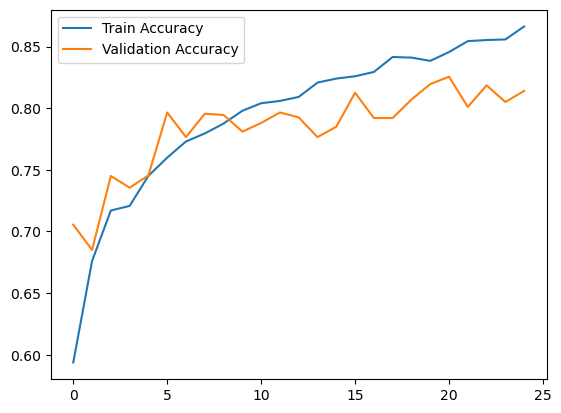

In [6]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [7]:
from tensorflow.keras.utils import load_img, img_to_array

def predict_image(image_path):
    image = load_img(image_path, target_size=(64, 64))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0) / 255.0
    prediction = model.predict(image_array)
    return 'Dog' if prediction[0][0] > 0.5 else 'Cat'

# Example prediction
result = predict_image('C:\Users\91807\Downloads\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\single_prediction')
print(f"The image is a: {result}")


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1261425748.py, line 11)

In [8]:
image_path = 'C:\\Users\\bhaum\\Desktop\\LU\\Machine Learning-Deep Learning\\Project - CNN for Image Classification\\Project - CNN for Image Classification\\dataset\\single_prediction\\example_image.jpg'


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directories for your training and test sets
train_dir = r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\training_set'
test_dir = r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\test_set'

# Define ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize images
                                   rotation_range=20,  # Data augmentation options
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directories
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(64, 64),  # Match model input size
                                                 batch_size=32,  # Set batch size
                                                 class_mode='binary')  # Binary classification (cat or dog)

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=25,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 277ms/step - accuracy: 0.7482 - loss: 0.5282 - val_accuracy: 0.8080 - val_loss: 0.4342
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2813
Epoch 3/25


C:\Users\bhaum\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 69s 277ms/step - accuracy: 0.7487 - loss: 0.5108 - val_accuracy: 0.8024 - val_loss: 0.4382
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3034
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 273ms/step - accuracy: 0.7628 - loss: 0.4899 - val_accuracy: 0.8059 - val_loss: 0.4305
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.4167
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 68s 274ms/step - accuracy: 0.7712 - loss: 0.4936 - val_accuracy: 0.8125 - val_loss: 0.4171
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.6784
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 287ms/step - accuracy: 0.7703 - loss: 0.4868 - val_accuracy: 0.7863 - val_loss: 0.4736
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.0000

In [11]:
# Save the model in the new Keras format
model.save(r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\model\cat_dog_model.keras')


In [13]:
# Load the model saved in .keras format
from tensorflow.keras.models import load_model

model = load_model(r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\model\cat_dog_model.keras')


In [14]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model(r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\model\cat_dog_model.h5')

def predict_image(image_path):
    """
    Predict whether an image is a dog or a cat.

    Args:
        image_path (str): Path to the image file.

    Returns:
        str: 'Dog' or 'Cat' based on the prediction.
    """
    try:
        # Load and preprocess the image
        image = load_img(image_path, target_size=(64, 64))  # Resize image to match model input size
        image_array = img_to_array(image)  # Convert image to numpy array
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
        image_array = image_array / 255.0  # Normalize pixel values to [0, 1]

        # Predict using the trained model
        prediction = model.predict(image_array)
        
        # Return result based on the prediction threshold
        return 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    except Exception as e:
        return f"Error processing image: {e}"

# Set the path to your image (replace 'example_image.jpg' with your actual image filename)
image_path = r'C:\Users\bhaum\Desktop\LU\Machine Learning-Deep Learning\Project - CNN for Image Classification\Project - CNN for Image Classification\dataset\single_prediction\cat_or_dog_1.jpg'

# Make the prediction and print the result
result = predict_image(image_path)
print(f"The image is a: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
The image is a: Dog


Github link - https://github.com/Bhaumit2805/Image-Classification


medium link - https://medium.com/@bhaumitmaniya/building-cnn-model-for-image-classification-for-dogs-and-cats-2039a626f01e